<a href="https://colab.research.google.com/github/Mezirix/AIDA-Saskpoly/blob/main/Assignment_2_Support_Vector_Machine_(SVM)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Members

* Idogesit Utah
* Evelyn Emoedume
* Christiantus Anyanwu

# Objective:
The objective of this assignment is to apply Support Vector Machine (SVM) and Decision Tree models, on two different datasets - the Titanic dataset and the Diabetes dataset. The focus is on training these models, comparing their test accuracies, and exploring the feature importance using the Decision Tree model.


* * Task 1: Titanic Dataset

In [25]:
# Imports the necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt




In [2]:
# Load dataset
titanic_df = pd.read_csv('titanic.csv')

Preprocess the Data

Handle missing values (e.g., fill or drop).
Encode categorical variables (e.g., using pd.get_dummies for one-hot encoding).

In [3]:
# Fill missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)


<ipython-input-3-5660a25e77fe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
<ipython-input-3-5660a25e77fe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

# Split the Dataset

In [5]:

X = titanic_df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train an SVM Model

In [8]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)


# Train a Decision Tree Model

In [9]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)

# Compare Test Accuracies

In [10]:
print(f"SVM Test Accuracy: {svm_accuracy}")
print(f"Decision Tree Test Accuracy: {tree_accuracy}")


SVM Test Accuracy: 0.6082089552238806
Decision Tree Test Accuracy: 0.7574626865671642


Analyze Feature Importance for Diabetes Dataset

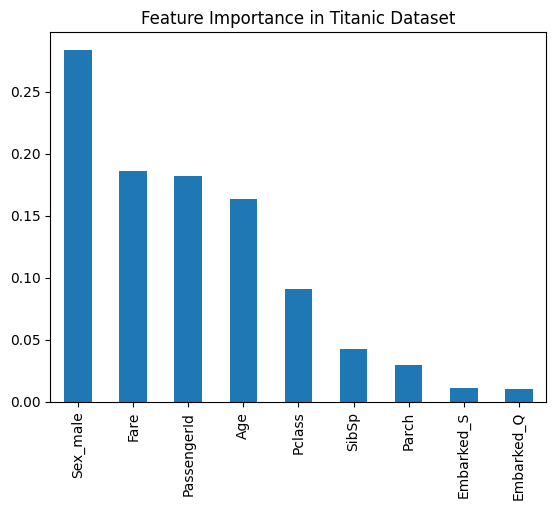

In [34]:
# Feature importance using Decision Tree

feature_importances_titanic = tree_model.feature_importances_
features_titanic = pd.Series(feature_importances_titanic, index=feature_names).sort_values(ascending=False)

# Plotting
features_titanic.plot(kind='bar', title='Feature Importance in Titanic Dataset')
plt.show()

# Task 2: Diabetes Dataset



1.   Load the Diabetes Dataset


In [20]:
diabetes_df = pd.read_csv('diabetes.csv')


2. Preprocess the Data

Check for missing values.
We Performed some necessary preprocessing.

3. * Split the dataset into training and testing sets using a 70-30 ratio and a random state of 42.

In [12]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


4. Train an SVM Model

In [13]:
svm_model_diabetes = SVC()
svm_model_diabetes.fit(X_train, y_train)
svm_pred_diabetes = svm_model_diabetes.predict(X_test)
svm_accuracy_diabetes = accuracy_score(y_test, svm_pred_diabetes)


5. Train a Decision Tree Model

In [14]:
tree_model_diabetes = DecisionTreeClassifier(random_state=42)
tree_model_diabetes.fit(X_train, y_train)
tree_pred_diabetes = tree_model_diabetes.predict(X_test)
tree_accuracy_diabetes = accuracy_score(y_test, tree_pred_diabetes)


6. Compare Test Accuracies

In [15]:
print(f"SVM Test Accuracy (Diabetes): {svm_accuracy_diabetes}")
print(f"Decision Tree Test Accuracy (Diabetes): {tree_accuracy_diabetes}")


SVM Test Accuracy (Diabetes): 0.7359307359307359
Decision Tree Test Accuracy (Diabetes): 0.7012987012987013


* Task 3: Feature Importance Analysis

1. Feature Importance in Titanic Dataset

In [18]:
# Assuming 'X_train' was the DataFrame used for training the tree_model
feature_importance_titanic = tree_model.feature_importances_

# Get the feature names used during training.
feature_names = tree_model.feature_names_in_

important_features_titanic = pd.Series(feature_importance_titanic, index=feature_names).sort_values(ascending=False)

print("Feature Importances (Titanic Dataset):")
print(important_features_titanic)


Feature Importances (Titanic Dataset):
Sex_male       0.283660
Fare           0.186246
PassengerId    0.181643
Age            0.163476
Pclass         0.090798
SibSp          0.042993
Parch          0.029411
Embarked_S     0.011352
Embarked_Q     0.010422
dtype: float64


* Feature Importance in Diabetes Dataset

In [19]:
feature_importance_diabetes = tree_model_diabetes.feature_importances_
important_features_diabetes = pd.Series(feature_importance_diabetes, index=X.columns).sort_values(ascending=False)
print("Feature Importances (Diabetes Dataset):")
print(important_features_diabetes)


Feature Importances (Diabetes Dataset):
Glucose                     0.356937
BMI                         0.186479
Age                         0.134134
BloodPressure               0.097345
DiabetesPedigreeFunction    0.096871
SkinThickness               0.061428
Insulin                     0.039552
Pregnancies                 0.027255
dtype: float64


Analyze Feature Importance for Diabetes Dataset

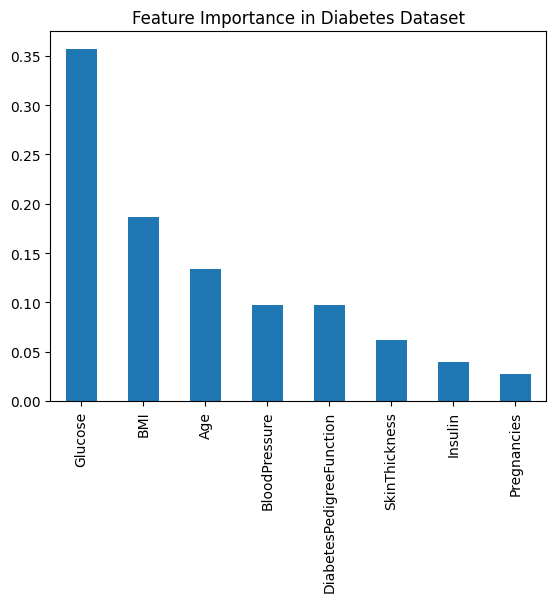

In [26]:
# Feature importance using Decision Tree
feature_importances_diabetes = tree_model_diabetes.feature_importances_
features_diabetes = pd.Series(feature_importances_diabetes, index=X.columns).sort_values(ascending=False)
# Plotting
features_diabetes.plot(kind='bar', title='Feature Importance in Diabetes Dataset')
plt.show()
